<a href="https://colab.research.google.com/github/embee430/Data-Projects/blob/main/KNearestNeighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#A classification problem using KNearestNeighbours to model and predict service usage of customers into 4 groups, 
#1- Basic Service 2- E-Service 3- Plus Service 4- Total Service
#Based on customer features for example, region,tenure,age,marital status,address, income, ed,employ, retire, gender, reside. 

In [1]:
!pip install scikit-learn==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 22.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [5]:
data = '/content/teleCust1000t.csv'
df = pd.read_csv(data)

In [6]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [14]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe24d1aa950>]],
      dtype=object)

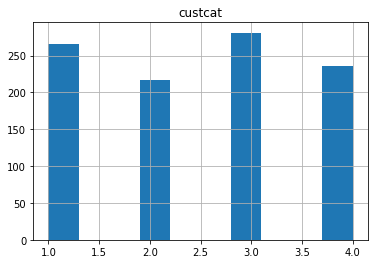

In [19]:
df.hist(column='custcat', bins=10)

In [20]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [21]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [25]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [26]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [30]:
df['custcat'].tail(5)

995    1
996    1
997    4
998    3
999    2
Name: custcat, dtype: int64

In [31]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [35]:
y_test

array([4, 1, 1, 2, 4, 4, 3, 1, 3, 4, 4, 2, 4, 1, 4, 3, 4, 2, 3, 4, 1, 1,
       1, 3, 4, 4, 4, 2, 4, 3, 1, 1, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 1, 1,
       2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 4, 3, 1, 4, 1, 2, 3, 3, 3, 1,
       4, 3, 2, 4, 3, 1, 4, 3, 1, 4, 2, 4, 3, 2, 1, 3, 1, 1, 1, 2, 3, 2,
       1, 3, 4, 1, 3, 1, 3, 1, 4, 1, 1, 3, 4, 1, 4, 3, 4, 4, 2, 1, 3, 4,
       4, 1, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 2, 3, 3, 4, 2, 4, 2, 1, 2, 1,
       3, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2, 3, 1, 4, 3, 2, 2, 3, 4, 4, 4, 2,
       2, 3, 1, 2, 4, 3, 3, 1, 1, 3, 1, 4, 4, 1, 3, 2, 1, 2, 4, 2, 4, 2,
       2, 3, 4, 1, 1, 2, 3, 1, 4, 1, 4, 1, 3, 4, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 3])

In [36]:
y_test[0:5]

array([4, 1, 1, 2, 4])

In [37]:
#Evaluation of our model

In [38]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [53]:
#We can find the accuracy score of different values of K neighbours
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

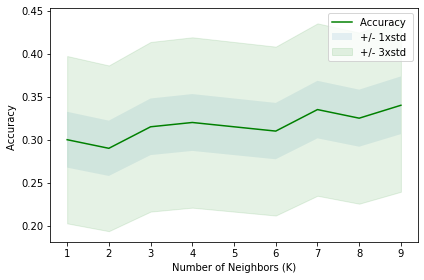

In [54]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


In [43]:
#Lets train the model again with 9 neighbours

k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

In [46]:
#Lets predict
yhat = neigh.predict(X_test)
yhat[0:200]


array([3, 1, 3, 2, 4, 3, 3, 4, 3, 1, 1, 4, 3, 2, 2, 1, 3, 4, 3, 2, 3, 2,
       1, 4, 1, 3, 1, 1, 1, 1, 3, 1, 4, 2, 1, 2, 1, 1, 2, 2, 3, 4, 1, 1,
       4, 4, 3, 1, 4, 4, 2, 1, 2, 1, 2, 2, 3, 3, 1, 4, 1, 4, 2, 1, 3, 1,
       1, 2, 2, 1, 1, 3, 2, 3, 1, 1, 4, 1, 4, 3, 3, 1, 2, 1, 2, 1, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 4, 3, 1, 1, 4, 3, 2, 2, 2,
       1, 3, 2, 1, 1, 2, 1, 1, 2, 3, 4, 3, 2, 3, 1, 1, 4, 3, 1, 2, 3, 1,
       1, 4, 3, 2, 3, 1, 1, 3, 4, 3, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 4, 2,
       4, 3, 3, 3, 3, 4, 4, 1, 2, 3, 1, 4, 1, 1, 3, 2, 4, 4, 3, 2, 4, 2,
       3, 4, 1, 1, 3, 2, 1, 3, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3, 2, 4, 1, 3,
       2, 3])

In [47]:
#Compare above predicted values with actual values
y_test

array([4, 1, 1, 2, 4, 4, 3, 1, 3, 4, 4, 2, 4, 1, 4, 3, 4, 2, 3, 4, 1, 1,
       1, 3, 4, 4, 4, 2, 4, 3, 1, 1, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 1, 1,
       2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 4, 3, 1, 4, 1, 2, 3, 3, 3, 1,
       4, 3, 2, 4, 3, 1, 4, 3, 1, 4, 2, 4, 3, 2, 1, 3, 1, 1, 1, 2, 3, 2,
       1, 3, 4, 1, 3, 1, 3, 1, 4, 1, 1, 3, 4, 1, 4, 3, 4, 4, 2, 1, 3, 4,
       4, 1, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 2, 3, 3, 4, 2, 4, 2, 1, 2, 1,
       3, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2, 3, 1, 4, 3, 2, 2, 3, 4, 4, 4, 2,
       2, 3, 1, 2, 4, 3, 3, 1, 1, 3, 1, 4, 4, 1, 3, 2, 1, 2, 4, 2, 4, 2,
       2, 3, 4, 1, 1, 2, 3, 1, 4, 1, 4, 1, 3, 4, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 3])

In [48]:
#Evaluate for the score
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5025
Test set Accuracy:  0.34
